<a href="https://colab.research.google.com/github/dong-uk-kim97/Datatone/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%86%A42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Data

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [95]:
df = pd.read_csv('/content/drive/MyDrive/Stores.csv')

# 2. EDA & Feature Engineering

## 2-1. Summary

|종류|특징|
|:------:|:----------:|
|Store ID|매장번호|
|Store_Area|가게 규모|
|Item_Available|판매가능한 품목의 수|
|Daily_Customer_Count|일 평균 방문자|
|Store_Sales|매출|

feature로는 Store ID, Store_Area, Item_Available, Daily_Customer_Count, Store_Sales가 있다. 우리는 가게별 매출을 Target으로 잡고 분석을 한다.
하지만 StoreID는 인덱스이기 때문에 쓸 수 없다고 판단 drop을 하기로 한다.

In [96]:
del df['Store ID ']

In [97]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [98]:
df.tail()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610
895,1174,1429,1110,54340


In [99]:
df.shape

(896, 4)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [101]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


violinplot으로 분포 파악

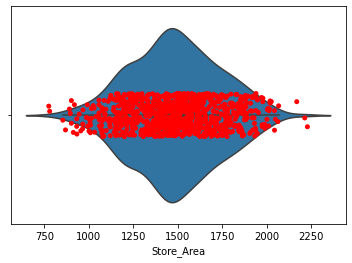

In [102]:
sns.violinplot(data=df, x=df['Store_Area'])
sns.stripplot(df['Store_Area'], color='r')

In [103]:
df['store_area_qcut'] = pd.qcut(df['Store_Area'], 4, labels=[1,2,3,4])

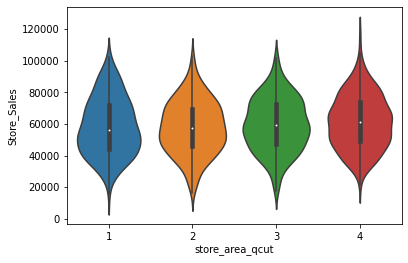

In [104]:
sns.violinplot(data=df, x=df['store_area_qcut'], y=df['Store_Sales'])

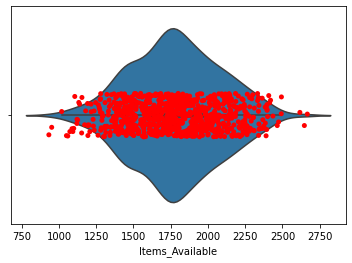

In [105]:
sns.violinplot(data=df, x=df['Items_Available'])
sns.stripplot(df['Items_Available'], color='r')

In [106]:
df['items_available_qcut'] = pd.qcut(df['Items_Available'], 4, labels=[1,2,3,4])

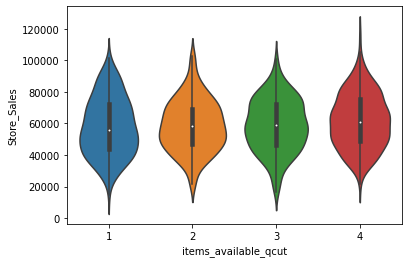

In [107]:
sns.violinplot(data=df, x=df['items_available_qcut'], y=df['Store_Sales'])

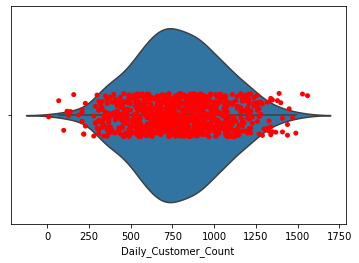

In [108]:
sns.violinplot(data=df, x=df['Daily_Customer_Count'])
sns.stripplot(df['Daily_Customer_Count'], color='r')

In [109]:
df['daily_cutomer_qcut'] = pd.qcut(df['Daily_Customer_Count'], 4, labels=[1,2,3,4])

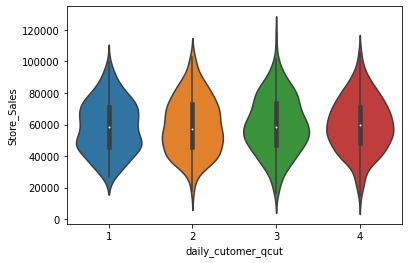

In [110]:
sns.violinplot(data=df, x=df['daily_cutomer_qcut'], y=df['Store_Sales'])

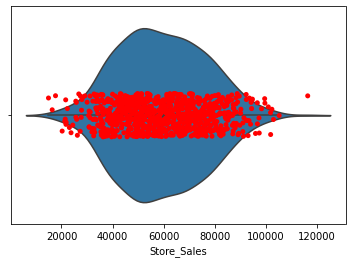

In [111]:
sns.violinplot(data=df, x=df['Store_Sales'])
sns.stripplot(df['Store_Sales'], color='r')

In [112]:
df['store_sales_qcut'] = pd.qcut(df['Store_Sales'], 4, labels=[1,2,3,4])

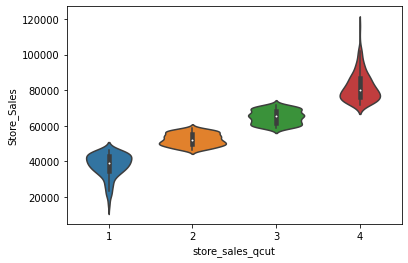

In [113]:
sns.violinplot(data=df, x=df['store_sales_qcut'], y=df['Store_Sales'])

pairplot으로 관계 보기

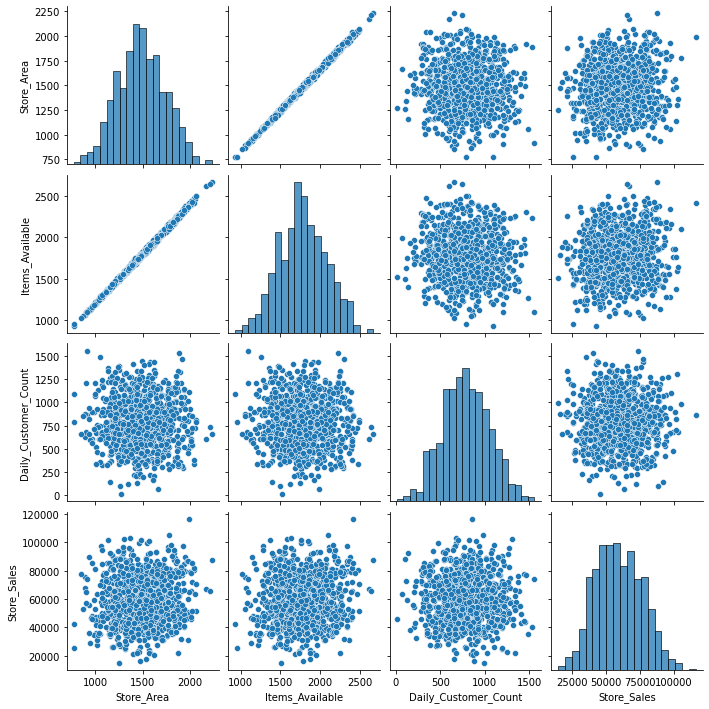

In [114]:
sns.pairplot(df)

Regplot으로 관계 파악하기

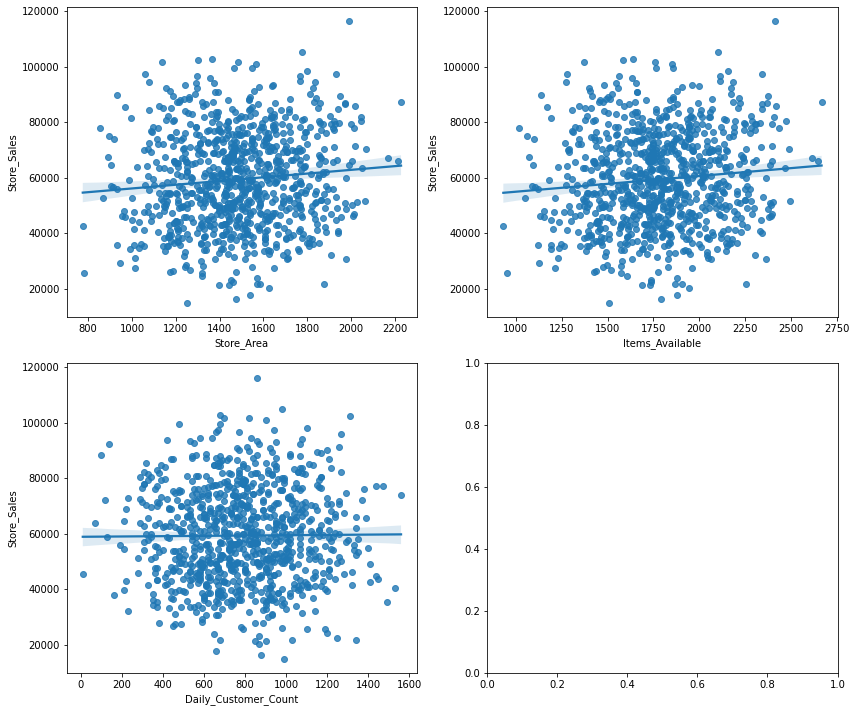

In [115]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

sns.regplot(x=df['Store_Area'], y=df['Store_Sales'], ax=ax[0,0])
sns.regplot(x=df['Items_Available'], y=df['Store_Sales'], ax=ax[0,1])
sns.regplot(x=df['Daily_Customer_Count'], y=df['Store_Sales'], ax=ax[1,0])
plt.tight_layout();

In [116]:
corr_df = df.corr()

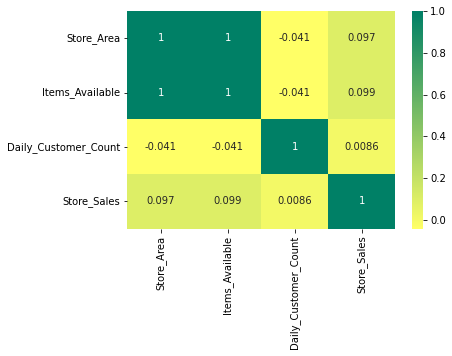

In [117]:
sns.heatmap(corr_df, annot=True, cmap='summer_r')

지금 현재 feature 중에 Items_Available과 Store_Area는 상관관계가 1이므로 다중공산성을 보인다고 판단했다. 그래서 우리는 PCA 차원축소를 하고자 한다.

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
df['pca'] = pca.fit_transform(df[['Store_Area','Items_Available']])

In [119]:
print(pca.explained_variance_ratio_)

[0.99946316]


기존의 변수만으로는 데이터 분석을 할 수 없다고 판단해서 다음과 같이 파생변수를 만든다.

In [120]:
# area feature
df['item_per_area'] = df['Items_Available']/df['Store_Area']
df['customer_per_area'] = df['Daily_Customer_Count']/ df['Store_Area']
# item feature
df['customer_per_item'] = df['Daily_Customer_Count']/df['Items_Available']

Store_Sales와 관련된 파생변수는 제외하고 새로운 파생변수를 만들었다. 왜냐하면 Store_Sales와 관련된 파생변수를 만들면 다중공산성 문제가 있을 수 있기 때문이다.

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Store_Area            896 non-null    int64   
 1   Items_Available       896 non-null    int64   
 2   Daily_Customer_Count  896 non-null    int64   
 3   Store_Sales           896 non-null    int64   
 4   store_area_qcut       896 non-null    category
 5   items_available_qcut  896 non-null    category
 6   daily_cutomer_qcut    896 non-null    category
 7   store_sales_qcut      896 non-null    category
 8   pca                   896 non-null    float64 
 9   item_per_area         896 non-null    float64 
 10  customer_per_area     896 non-null    float64 
 11  customer_per_item     896 non-null    float64 
dtypes: category(4), float64(4), int64(4)
memory usage: 60.4 KB


## 2-2. statisitc

왜도와 첨도

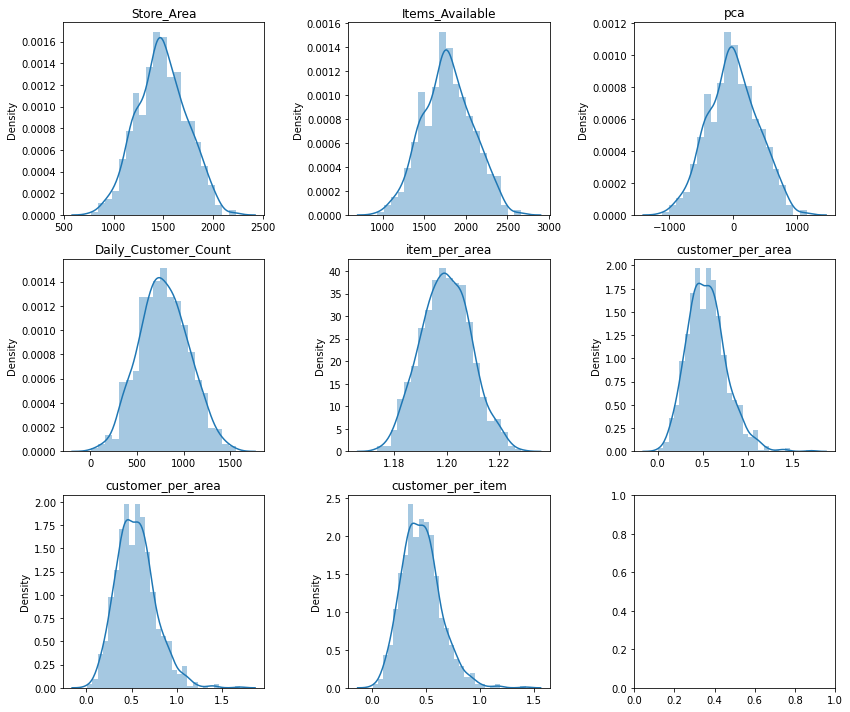

In [122]:
fig, ax = plt.subplots(3,3, figsize=(12,10))

sns.distplot(x=df['Store_Area'],  ax=ax[0,0])
ax[0,0].set_title('Store_Area')
sns.distplot(x=df['Items_Available'], ax=ax[0,1])
ax[0,1].set_title('Items_Available')
sns.distplot(x=df['pca'], ax=ax[0,2])
ax[0,2].set_title('pca')
sns.distplot(x=df['Daily_Customer_Count'], ax=ax[1,0])
ax[1,0].set_title('Daily_Customer_Count')
sns.distplot(x=df['item_per_area'],  ax=ax[1,1])
ax[1,1].set_title('item_per_area')
sns.distplot(x=df['customer_per_area'], ax=ax[1,2])
ax[1,2].set_title('customer_per_area')
sns.distplot(x=df['customer_per_area'], ax=ax[2,0])
ax[2,0].set_title('customer_per_area')
sns.distplot(x=df['customer_per_item'], ax=ax[2,1])
ax[2,1].set_title('customer_per_item')

plt.tight_layout();

In [123]:
skew=df.skew()
kurt=df.kurtosis()

In [124]:
print(skew)

Store_Area              0.030367
Items_Available         0.034439
Daily_Customer_Count    0.074633
Store_Sales             0.148794
pca                     0.032288
item_per_area           0.069533
customer_per_area       0.661734
customer_per_item       0.661027
dtype: float64


왜도의 절대값 < 0.5 이면 데이터가 상당히 대칭적이라고 판단한다.\
0.5<= 왜도의 절대값<2 이면 데이터가 적당히 치우쳐져있다고 판단한다.\
왜도의 절대값 >2이면 데이터가 상당히 치우쳐져있다고 판단한다.\
그래서 각 feature들의 왜도는 customer_per_area와 customer_per_item 정도를 제외하고 대칭적이라 판단할 수 있다.

In [125]:
print(kurt)

Store_Area             -0.282545
Items_Available        -0.281090
Daily_Customer_Count   -0.259751
Store_Sales            -0.456116
pca                    -0.282069
item_per_area          -0.261314
customer_per_area       1.216596
customer_per_item       1.238541
dtype: float64


정규분포가 |왜도| <3, |첨도|<7일 때를 말하기 때문에 모두 정상 범위에 있다고 판단할 수 있다.

vif

In [126]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales',
       'pca', 'item_per_area', 'customer_per_area', 'customer_per_item']]

def feature_engineering_XbyVIF(X):
  vif=pd.DataFrame()
  vif['VIF_Factor'] = [variance_inflation_factor(X.values, i)
                        for i in range(X.shape[1])]
  vif['Feature'] = X.columns
  return vif

vif = feature_engineering_XbyVIF(X)
print(vif)

     VIF_Factor               Feature
0  2.242523e+05            Store_Area
1  2.414762e+06       Items_Available
2  1.973084e+01  Daily_Customer_Count
3  1.012143e+00           Store_Sales
4  3.601475e+04                   pca
5  7.828221e+01         item_per_area
6  2.127687e+04     customer_per_area
7  2.125350e+04     customer_per_item


다중회귀분석에서 독립변수가 다중 공산성(Multicollnearity)의 문제를 갖고 있는지 판단하는 기준이며, 주로 10보다 크면 그 독립변수는 다중공산성이 있다고 말합니다. 하지만 지금 feature에서는 다중공산성을 발견할 수 없기 때문에 다음으로 넘어갑니다.

## 2-3 Visualization

In [127]:
corr_df=df.corr()

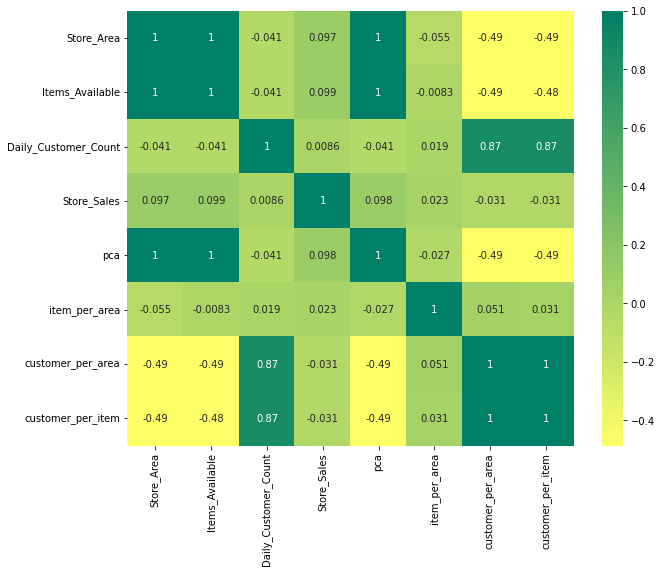

In [128]:
sns.heatmap(corr_df, annot=True, cmap='summer_r')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

각 feature와 target과의 상관관계를 파악할 수 없었다.

## 2-4. Feature Engineering

필요없는 feature 없애기

In [129]:
df.keys()

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales',
       'store_area_qcut', 'items_available_qcut', 'daily_cutomer_qcut',
       'store_sales_qcut', 'pca', 'item_per_area', 'customer_per_area',
       'customer_per_item'],
      dtype='object')

In [130]:
df.drop(columns=['Items_Available', 'Store_Area', 'store_area_qcut', 'items_available_qcut', 'daily_cutomer_qcut', 'store_sales_qcut'], inplace=True)

PCA로 차원을 하나로 합쳤기 때문에 기존의 상관관계가 1이던 feature를 없앴다.

Target 값 제거

In [131]:
y = df['Store_Sales']
del df['Store_Sales']

이상치 탐지 - visual

Text(0.5, 1.0, 'customer_per_item')

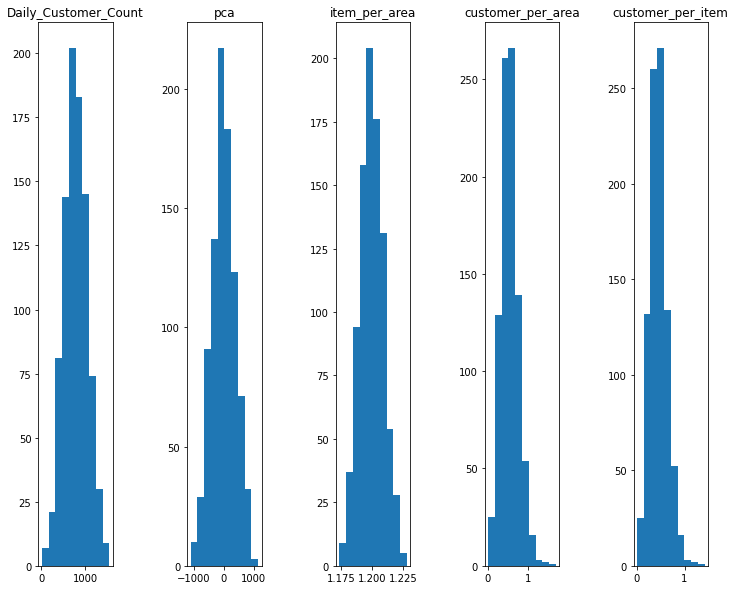

In [132]:
fig, ax = plt.subplots(1,5, figsize=(12,10))
fig = plt.subplots_adjust(hspace=1, wspace=1)

ax[0].hist(x=df['Daily_Customer_Count'])
ax[0].set_title('Daily_Customer_Count')

ax[1].hist(x=df['pca'])
ax[1].set_title('pca')

ax[2].hist(x=df['item_per_area'])
ax[2].set_title('item_per_area')

ax[3].hist(x=df['customer_per_area'])
ax[3].set_title('customer_per_area')

ax[4].hist(x=df['customer_per_item'])
ax[4].set_title('customer_per_item')

중복치 탐지

In [133]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
891    False
892    False
893    False
894    False
895    False
Length: 896, dtype: bool

## 모델링

선형회귀

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [135]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [136]:
from sklearn.metrics import mean_squared_log_error

In [137]:
def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle=np.sqrt(np.mean(squared_error))
  return rmsle

In [138]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
rmsle(y_test,pred)

0.29421982178433786

xgboost

In [139]:
import xgboost as xgb
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmsle(y_test, pred)

[02:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.3051331605315406

randomforest

In [140]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmsle(y_test, pred)

0.3251396059173737

robustscaler 활용한 모델링

선형회귀

In [141]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)
lr_pred=lr.predict(X_test_scaled)
rmsle(y_test, lr_pred)

0.294219821784338

xgboost

In [142]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBRegressor()
model.fit(X_train_scaled, y_train)
xgb_pred=model.predict(X_test_scaled)
rmsle(y_test, xgb_pred)

[02:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.3051331605315406

randomforest

In [143]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
rmsle(y_test, pred)

0.32837828149461473

# 출처

첨도\
https://stat-university.tistory.com/entry/%EC%99%9C%EB%8F%84skew%EC%99%80-%EC%B2%A8%EB%8F%84kurtosis%EC%9D%98-%EC%9D%98%EB%AF%B8%EB%8A%94-%EB%AD%98%EA%B9%8C2%ED%8E%B8-%EC%B2%A8%EB%8F%84-%ED%8E%B8

왜도\
https://stat-university.tistory.com/entry/%EC%99%9C%EB%8F%84skew%EC%99%80-%EC%B2%A8%EB%8F%84kurtosis%EC%9D%98-%EC%9D%98%EB%AF%B8%EB%8A%94-%EB%AD%98%EA%B9%8C1%ED%8E%B8-%EC%99%9C%EB%8F%84-%ED%8E%B8

vif\
https://laoonlee.tistory.com/12 \

https://bkshin.tistory.com/entry/DATA-20-%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC-VIF

PCA\
https://jimmy-ai.tistory.com/128 \

시각화\
https://pyvisuall.tistory.com/110 \

IQR\
https://aliencoder.tistory.com/36 \ 
